In [1]:
from lib import histfit
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [2]:
def get_means_stds(names):
    times = {} 
    diffs = {}
    means = {}
    stds = {}

    for name in names:
        diffs[name] = []
        times[name] = []

        data_times = open("data/2023-01-16/Time-2023-01-16-"+name+".txt", "r")

        for row in data_times:

            row = row.replace("\n", "")
            row = row.replace(",", ".")
            terms = row.split("\t")
            terms = np.sort([float(terms[term]) for term in range(len(terms))])
            #diffs[name] = diffs[name] + [terms[i+1] - terms[i] for i in range(len(terms)-1)]
            
            for i, term in enumerate(terms):
                if term > 1:
                    times[name].append(term)
                    if i < len(terms)-1 and terms[i+1] > 1:
                        diffs[name].append(terms[i+1] - term)

        if len(times[name]) > 1:
            means[name] = np.mean(times[name])
            stds[name] = np.std(times[name])/np.sqrt(len(times[name]))
        else:
            means[name] = 0
            stds[name] = 0
    
    N_tot = sum([len(lista_i) for lista_i in list(times.values())])
    print(N_tot)
    
    return times, diffs, means, stds

305


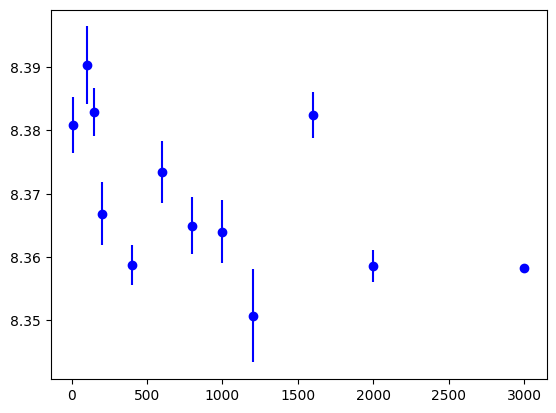

In [3]:
names = ["20_", "175_", "400_", "500_", "600_", "1000_", "1600_", "1800_", "2100_", "2500_", "3000_"] 
eval_times = [20, 175, 400, 500, 600, 1000, 1600, 1800, 2100, 2500, 3000]

names = ["0_200", "1_3000", "2_10", "3_1000", "4_2000", "5_400", "6_800", "7_1200", "8_100", "9_600", "10_150", "11_1600"] 
eval_times = [200, 3000, 10, 1000, 2000, 400, 800, 1200, 100, 600, 150, 1600]

times, diffs, means, stds = get_means_stds(names)
#print(diffs)

for i, name in enumerate(names):
    #plt.plot(eval_times[i], means[name], marker="o", c="blue")
    plt.errorbar(eval_times[i], means[name], stds[name], marker="o", c="blue")
    #plt.plot(eval_times[i], stds[name], marker="o", c="blue")
plt.show()

In [19]:
def fit_function(theta):
   if theta[1] <= 0:
      def fun(x):
         return 0
   else:
      def fun(x):
         return np.e**(-(x-theta[0])**2/(2*theta[1]**2)) / np.sqrt(2*np.pi*theta[1]**2)
   return fun

In [20]:
i = 4
range_h=[8.3,8.5]
#range_h = [min(times[names[0]]), 8.5]
n_bins = 10
name = names[i]
theta_0 = [np.mean(times[name]), np.std(times[name])]
data = np.histogram(times[name], bins=np.linspace(range_h[0], range_h[1], n_bins))

In [21]:
min_fit = histfit.hist_fit2(data[0], data[1], fit_function, theta_0)
print(min_fit.x)
print(theta_0)

[8.36117746e+00 8.45200906e-04]
[8.3586055, 0.004982499999999668]


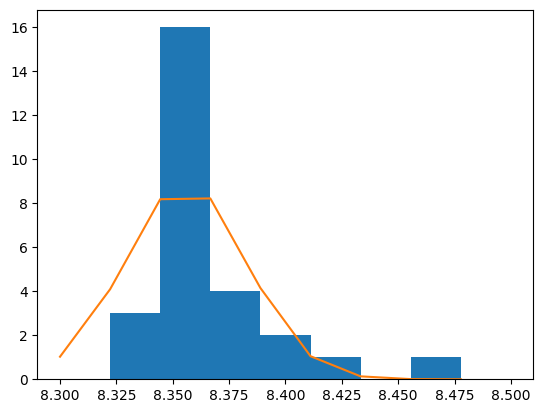

In [ ]:
best_fun = fit_function(theta_0)
N = np.sum(data[0])

def binned_fit_function(i):
   return scipy.integrate.quad(best_fun, data[1][i], data[1][i+1])

x = np.linspace(range_h[0],range_h[1], n_bins)
y = np.array([binned_fit_function(i)[0] for i in range(n_bins-1)])

plt.hist(times[name], bins=np.linspace(range_h[0], range_h[1], n_bins))
plt.plot(x[:-1],y*N)
plt.show()